In [1]:
#from jupyterthemes import get_themes
#from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('oceans16')

In [16]:
import tensorflow as tf
import os
import cv2
import imghdr

### limiting our memory growth

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [18]:
data_directory= 'data'
img_extensions=['jpeg','jpg','bmp','png']
#Supported image formats: jpeg, png, bmp, gif in keras API i will use later

#os.remove('data/.DS_Store')
os.listdir(data_directory)

['happy', 'sad']

## Some data from google images - deleting those I don't need .

In [19]:
for image_classe in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory,image_classe)):
        #os.path.join() method in Python join one or more path components intelligently
        image_path = os.path.join(data_directory,image_classe,image)
        try :
            img = cv2.imread(image_path) # to load the image
            
            ext = imghdr.what(image_path) #determines the type of image
            if ext not in img_extensions:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            #print('issue with image{}'.format(image_path))
             print(e)

## Now let's Load the Data
#### I will be using tf.data.Dataset API

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory(data_directory)
#will return a tf.data.Dataset that yields batches of images from the subdirectories 
#class_a and class_b, together with labels 0 and 1 
#(0 corresponding to class_a and 1 corresponding to class_b).



Found 175 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()
#Returns an iterator which converts all elements of the dataset to numpy.

In [23]:
batch = data_iterator.next()
#The next() function returns the next item in an iterator.

In [24]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

#### 0= Happy  -  1= Sad

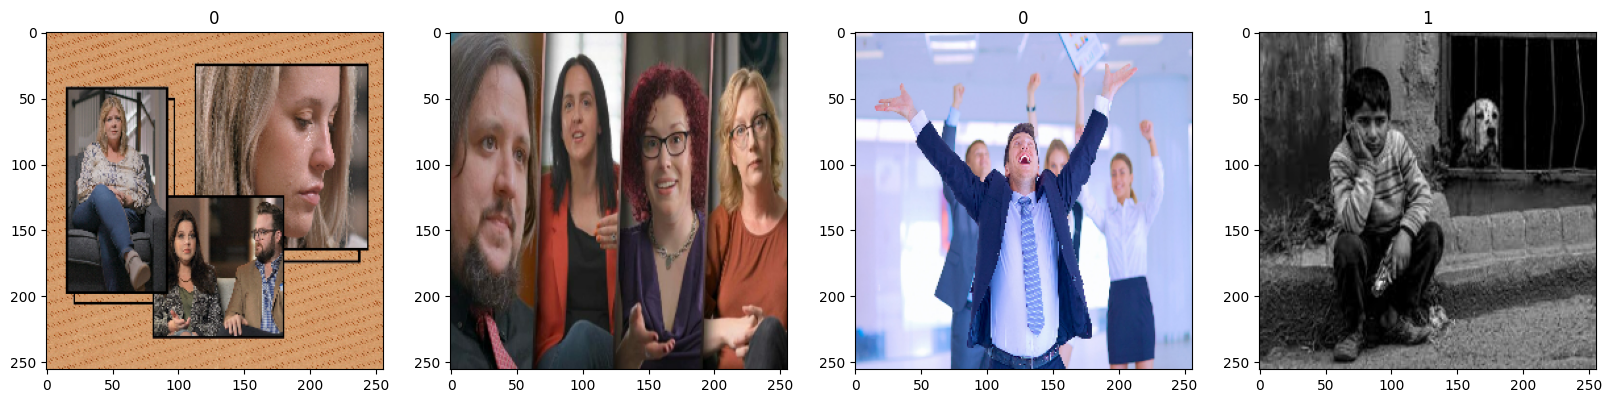

In [25]:

fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx] .imshow (img. astype (int))
    ax[idx].title.set_text(batch[1][idx])


# Preprocessing data


In [26]:
#A lambda function can take any number of arguments, but can only have one expression.
#lambda arguments : expression

In [27]:
data = data.map(lambda x , y: (x/255,y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [30]:
batch = scaled_iterator.next()

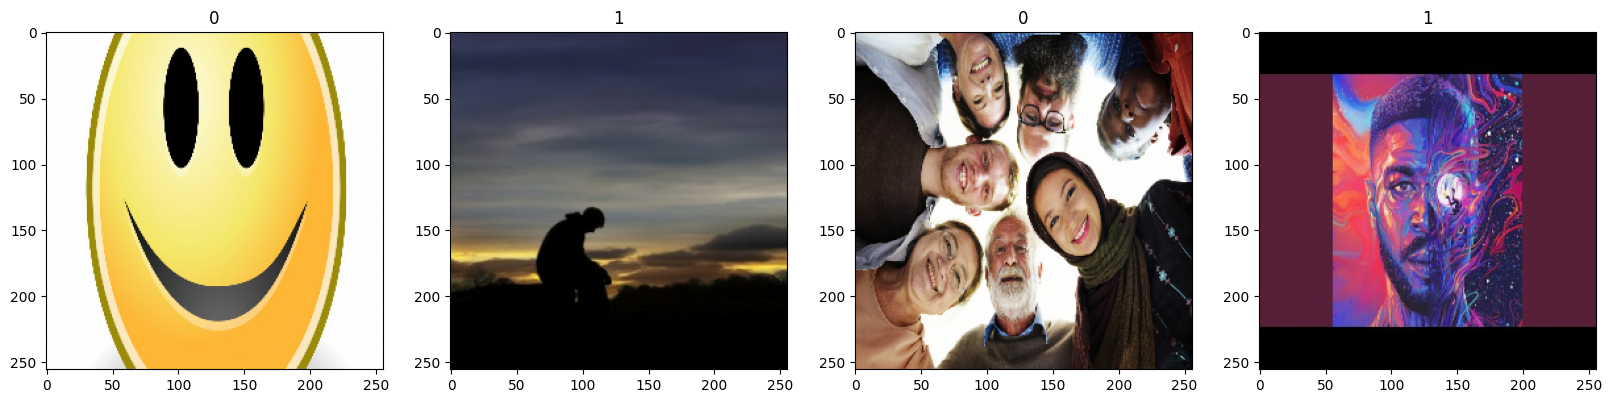

In [31]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx] .imshow (img)
    ax[idx].title.set_text(batch[1][idx])

## splitting the data 

In [32]:
len(data)

6

In [33]:
train_sz = int(len(data)*.6)
val_sz = int(len(data)*.2)+1
test_sz = int(len(data)*.2)+1

In [35]:
train_sz

3

In [36]:
# skip(count, name=None) : Creates a Dataset that skips count elements from this dataset.
#take(count, name=None) : Creates a Dataset with at most count elements from this dataset.

In [37]:
train = data.take(train_sz)
val = data.skip(train_sz).take(val_sz)
test = data.skip(train_sz+val_sz).take(test_sz)

In [38]:
len(test)

1

## Building Deep learning model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16,(3,3), 1, activation ='relu', input_shape =(256, 256, 3)))
model.add(MaxPooling2D ())

model. add(Conv2D (32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D ())

model.add(Conv2D (16, (3,3), 1, activation='relu')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense (256, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.compile('adam' , loss=tf.losses.BinaryCrossentropy (), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### trainning the model

In [44]:
logdir = 'logs'

In [46]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
histo = model.fit(train, epochs = 20, validation_data =val, callbacks=[tf_callback])

Epoch 1/20
3/3 [==============================] - 4s 888ms/step - loss: 1.1785 - accuracy: 0.5312 - val_loss: 0.7011 - val_accuracy: 0.5156
Epoch 2/20
3/3 [==============================] - 3s 855ms/step - loss: 0.7552 - accuracy: 0.4375 - val_loss: 0.6993 - val_accuracy: 0.4531
Epoch 3/20
3/3 [==============================] - 3s 855ms/step - loss: 0.6656 - accuracy: 0.5312 - val_loss: 0.7253 - val_accuracy: 0.4844
Epoch 4/20
3/3 [==============================] - 3s 881ms/step - loss: 0.6292 - accuracy: 0.5833 - val_loss: 0.5783 - val_accuracy: 0.6719
Epoch 5/20
3/3 [==============================] - 3s 889ms/step - loss: 0.5820 - accuracy: 0.6458 - val_loss: 0.5681 - val_accuracy: 0.6094
Epoch 6/20
3/3 [==============================] - 3s 866ms/step - loss: 0.5649 - accuracy: 0.6875 - val_loss: 0.5108 - val_accuracy: 0.7969
Epoch 7/20
3/3 [==============================] - 3s 891ms/step - loss: 0.5199 - accuracy: 0.8542 - val_loss: 0.5111 - val_accuracy: 0.7969
Epoch 8/20
3/3 [====

In [48]:
histo

In [50]:
histo.history

{'loss': [1.1784543991088867,
  0.7551905512809753,
  0.6656473278999329,
  0.6292499899864197,
  0.5820239782333374,
  0.5649119019508362,
  0.5199229717254639,
  0.48011818528175354,
  0.44340112805366516,
  0.3703885078430176,
  0.4155716001987457,
  0.45832791924476624,
  0.36694350838661194,
  0.3690493106842041,
  0.3467378616333008,
  0.2915031611919403,
  0.2704356908798218,
  0.20837263762950897,
  0.17762811481952667,
  0.11302994936704636],
 'accuracy': [0.53125,
  0.4375,
  0.53125,
  0.5833333134651184,
  0.6458333134651184,
  0.6875,
  0.8541666865348816,
  0.7916666865348816,
  0.8125,
  0.875,
  0.7604166865348816,
  0.78125,
  0.90625,
  0.8645833134651184,
  0.9375,
  0.9583333134651184,
  0.9270833134651184,
  0.96875,
  0.96875,
  0.9895833134651184],
 'val_loss': [0.7011021971702576,
  0.6992617845535278,
  0.7252606153488159,
  0.5783406496047974,
  0.5680599808692932,
  0.5108237862586975,
  0.5111469030380249,
  0.48992422223091125,
  0.4283517599105835,
  0.440

### Plot performance

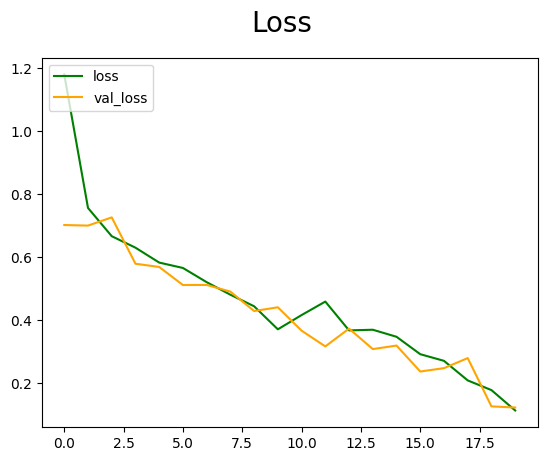

In [59]:
fig = plt.figure()
plt.plot (histo.history['loss'], color='green', label='loss') 
plt.plot(histo.history[ 'val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend (loc="upper left")
plt.show()


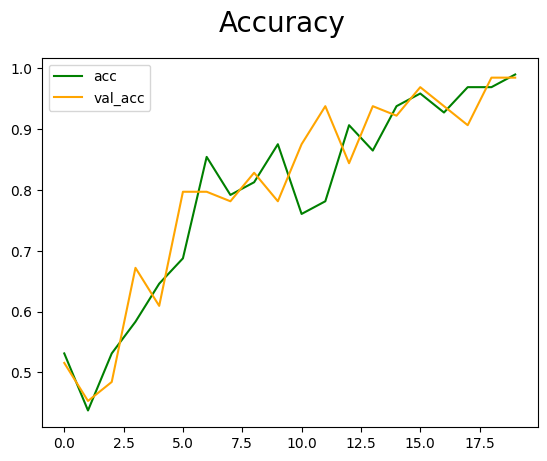

In [60]:
fig = plt.figure()
plt.plot (histo.history['accuracy'], color='green', label='acc') 
plt.plot(histo.history[ 'val_accuracy'], color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend (loc="upper left")
plt.show()

## Evaluating Performance

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 80ms/step


In [65]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test on my DATA

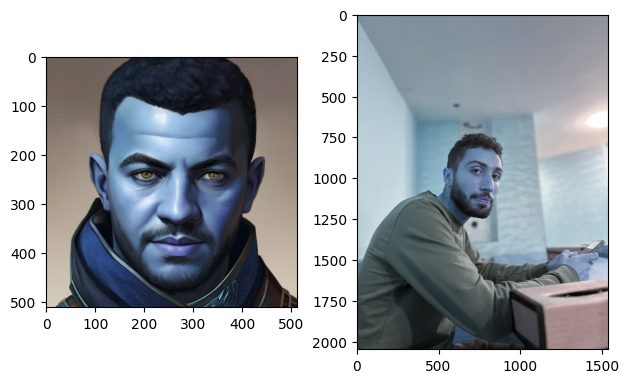

In [103]:
img1 = cv2.imread('MeTest.jpeg')
img2 = cv2.imread('YnsTest.jpeg')
plt.subplot(1, 2, 1)
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.imshow(img2)

plt.tight_layout()
#plt.subplot(1, 2, 1)
#plt.subplot(1, 2, 2)
plt.show()

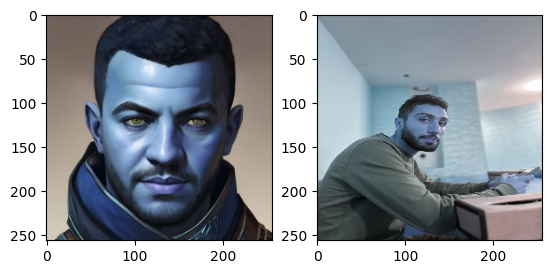

In [104]:
resize1 = tf.image.resize(img1, (256,256))

plt.subplot(1, 2, 1)
plt.imshow(resize1.numpy().astype(int))

resize2 = tf.image.resize(img2, (256,256))

plt.subplot(1, 2, 2)
plt.imshow(resize2.numpy().astype(int))


plt.show()

In [105]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))
yhat1

1/1 [==============================] - 0s 19ms/step


array([[0.8936962]], dtype=float32)

In [106]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))
yhat2

1/1 [==============================] - 0s 19ms/step


array([[0.83656734]], dtype=float32)

In [107]:
if yhat1 > 0.5: 
    print(f'hicham is Sad')
else:
    print(f'hicham is Happy')

hicham is Sad


In [102]:
if yhat2 > 0.5: 
    print(f'Younes is Sad')
else:
    print(f'Younes is Happy')

Younes is Sad


## Saving the Model for other developers 

In [121]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','HappySadByHicham.h5'))

In [123]:
H_model = load_model(os.path.join('models', 'HappySadByHicham.h5'))

In [126]:
yhat = H_model.predict(np.expand_dims (resize2/255, 0))

1/1 [==============================] - 0s 20ms/step


In [127]:
if yhat > 0.5:
    print (f'Predicted class is Sad')
else:
    print (f'Predicted class is Happy')

Predicted class is Sad
